In [1]:
import pandas as pd

In [2]:
# 1. Carregar el dataset preprocessat
file_path = 'barcelona_compra_idealista_tags.csv'
data = pd.read_csv(file_path)

## Preprocessament

In [3]:
data

,preu_actual,preu_original,descompte,titol,enllaç,descripcio,agent_nom,parking,tags,habs,metres2
0,2.450.000€,2.590.000 €,5%,"Pis a carrer de València, La Dreta de l'Eixamp...",https://www.idealista.com/ca/inmueble/105473433/,Aquest increïble habitatge reformat a estrenar...,Bcn Advisors,No indicat,"Reformat, Luxe",4,253
1,750.000€,785.000 €,4%,"Àtic a Gran Via de les Corts Catalanes, L'Anti...",https://www.idealista.com/ca/inmueble/103930029/,Aquest meravellós àtic de 87 m2 construïts int...,Bcn Advisors,No indicat,Lluminós,2,97
2,765.000€,NaN,0%,"Pis a carrer de la Mercè, El Gòtic, Barcelona",https://www.idealista.com/ca/inmueble/106475860/,Apartament de luxe a Passeig de Colom amb vist...,Walter Haus Barcelona,No indicat,Vistes al mar,2,110
3,1.275.000€,NaN,0%,"Pis a passeig de Colom, El Gòtic, Barcelona",https://www.idealista.com/ca/inmueble/106476051/,Exclusiu pis de 131 m² al Barri Gòtic de Barce...,Walter Haus Barcelona,No indicat,Vistes al mar,2,131
4,1.350.000€,1.400.000 €,4%,"Pis a passeig de Gràcia, La Dreta de l'Eixampl...",https://www.idealista.com/ca/inmueble/105043094/,Aquest pis de luxe es troba al Passeig de Gràc...,Bcn Advisors,No indicat,Lluminós,3,115
...,...,...,...,...,...,...,...,...,...,...,...
295,1.175.000€,NaN,0%,"Dúplex a carrer de Santa Anna, El Gòtic, Barce...",https://www.idealista.com/ca/inmueble/105298934/,Sensacional dúplex amb terrassa i elements ori...,Particular,No indicat,Lluminós,3,258
296,750.000€,NaN,0%,"Dúplex a carrer de El Escorial, Vila de Gràcia...",https://www.idealista.com/ca/inmueble/101064998/,Aquest dúplex moblat amb pati es troba a la pa...,Particular,No indicat,Lluminós,4,146
297,2.000.000€,NaN,0%,"Pis a Gran Via de les Corts Catalanes, La Dret...",https://www.idealista.com/ca/inmueble/102684456/,Aquesta increïble vivenda de 309 m2 construïts...,Particular,No indicat,"Lluminós, Luxe",5,409
298,460.000€,478.000 €,4%,"Pis a La Maternitat i Sant Ramon, Barcelona",https://www.idealista.com/ca/inmueble/104840329/,Pis ampli a reformar a Les Corts Engel & Völke...,Particular,No indicat,Reformat,3,115


In [4]:
# Si "preu_original" = NaN ; preu_original <- preu_actual
data['preu_original'] = data['preu_original'].fillna(data['preu_actual'])

In [5]:
data[['preu_actual', 'preu_original', 'habs', 'metres2']].describe()

,habs,metres2
count,300.000000,300.000000
mean,3.720000,202.023333
std,1.354393,116.607865
min,1.000000,39.000000
25%,3.000000,121.750000
50%,4.000000,180.000000
75%,5.000000,246.500000
max,8.000000,832.000000


In [6]:
# Eliminem el simbol del euro (€) i els punts que separen els milers. Convertim a tipus numèric.
data['preu_actual'] = data['preu_actual'].replace(r'[€\.\s]', '', regex=True).astype(float)
data['preu_original'] = data['preu_original'].replace(r'[€\.\s]', '', regex=True).astype(float)

# Mirem els percentils 1 i 99 de les variables numèriques.
percentile_01 = data[['preu_actual', 'preu_original', 'habs', 'metres2']].quantile(0.01)
percentile_99 = data[['preu_actual', 'preu_original', 'habs', 'metres2']].quantile(0.99)

# Trunquem aquests valors
for column in ['preu_actual', 'preu_original', 'habs', 'metres2']:
    data[column] = data[column].clip(lower=percentile_01[column], upper=percentile_99[column])

data[['preu_actual', 'preu_original', 'habs', 'metres2']].describe()

,preu_actual,preu_original,habs,metres2
count,3.000000e+02,3.000000e+02,300.000000,300.000000
mean,1.423441e+06,1.433688e+06,3.710100,200.982067
std,8.793823e+05,8.830337e+05,1.326307,111.628379
min,3.249500e+05,3.299500e+05,1.000000,53.990000
25%,7.500000e+05,7.500000e+05,3.000000,121.750000
50%,1.272500e+06,1.275000e+06,4.000000,180.000000
75%,1.800000e+06,1.800000e+06,5.000000,246.500000
max,4.900500e+06,4.900500e+06,7.010000,631.550000


L’anàlisi descriptiva de les dades mostra que el conjunt inclou 300 registres per a cadascuna de les variables analitzades. Pel que fa als preus, tant el preu actual com l’original tenen mitjanes similars, al voltant d’1,4 milions d’euros, cosa que reflecteix una estabilitat general en el valor de les propietats sense grans diferències entre el preu inicial i l’actual. La desviació estàndard per als preus és elevada, al voltant dels 880.000 euros, la qual cosa indica una gran variabilitat en el conjunt de dades. Els valors mínims dels preus, que es troben al voltant dels 325.000 euros, mostren l'existència de propietats més assequibles, mentre que els valors màxims, properes als 4,9 milions d’euros, suggereixen la presència de propietats de luxe que podrien influir significativament en les mitjanes. En relació al nombre d’habitacions, la mitjana és de 3,7 habitacions per propietat, amb una mediana de 4, fet que indica que la majoria de propietats tenen entre 3 i 4 habitacions. La variabilitat en aquesta característica és menor, amb un mínim d’una habitació i un màxim de set, cosa que denota que les propietats estan més concentrades en un rang moderat. Finalment, els metres quadrats tenen una mitjana de 201, amb una mediana de 180, fet que indica que la distribució d’aquesta característica és lleugerament esbiaixada cap a valors més alts. Els valors mínims, de poc més de 53 metres quadrats, reflecteixen l'existència d’habitatges més petits, mentre que els màxims arriben a 631 metres quadrats. En conjunt, aquestes dades suggereixen un mercat immobiliari divers, amb una distribució de característiques que inclou tant propietats assequibles i compactes com opcions més grans i de luxe, tot i que amb una concentració major en rangs intermedis.

## Data exploration

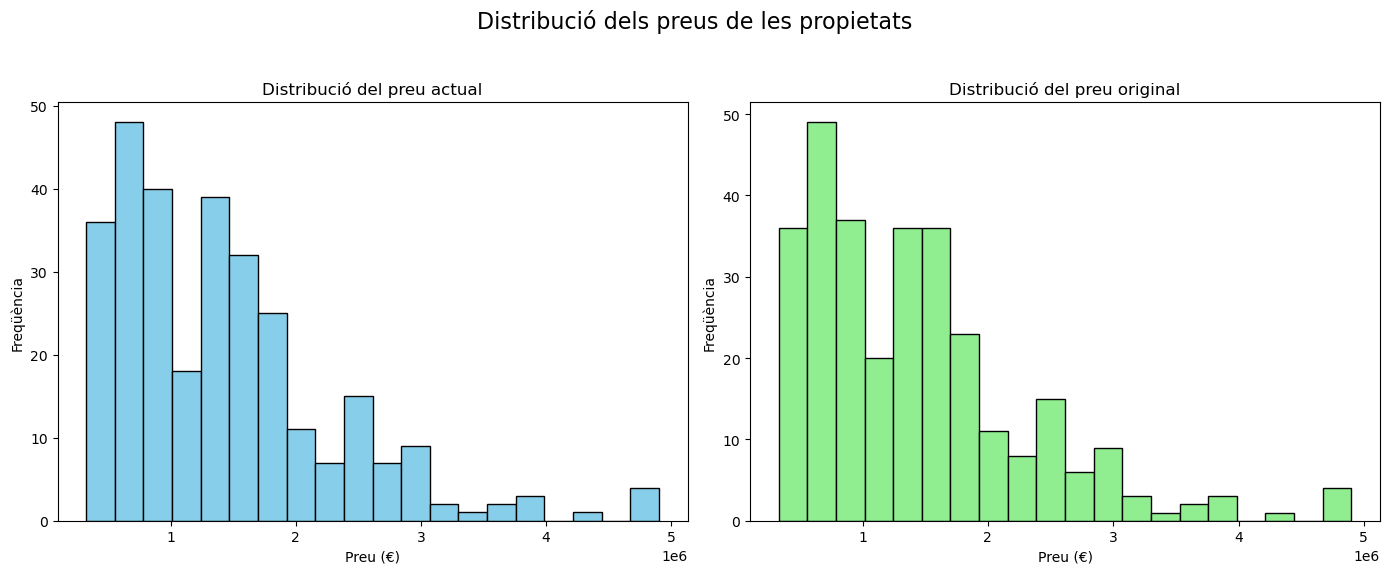

In [7]:
import matplotlib.pyplot as plt

# Creem una figura amb dues subgràfiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Distribució dels preus de les propietats', fontsize=16)

# Gràfica del preu actual
axes[0].hist(data['preu_actual'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribució del preu actual')
axes[0].set_xlabel('Preu (€)')
axes[0].set_ylabel('Freqüència')

# Gràfica del preu original
axes[1].hist(data['preu_original'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribució del preu original')
axes[1].set_xlabel('Preu (€)')
axes[1].set_ylabel('Freqüència')

# Ajustem el layout per evitar solapaments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


A partir de les gràfiques, es pot observar que tant els preus actuals com els preus originals de les propietats tenen una distribució similar, amb una concentració elevada de propietats en la franja de preus més baixos i una disminució progressiva a mesura que els preus augmenten. També es pot percebre que els preus més alts formen una cua llarga en la distribució, suggerint que hi ha algunes propietats de preu molt elevat que poden influir en les estadístiques agregades. Comparant ambdues distribucions, sembla que no hi ha grans diferències entre el preu original i el preu actual, el que podria suggerir que les variacions en el mercat immobiliari no són dràstiques en aquest conjunt de dades. 

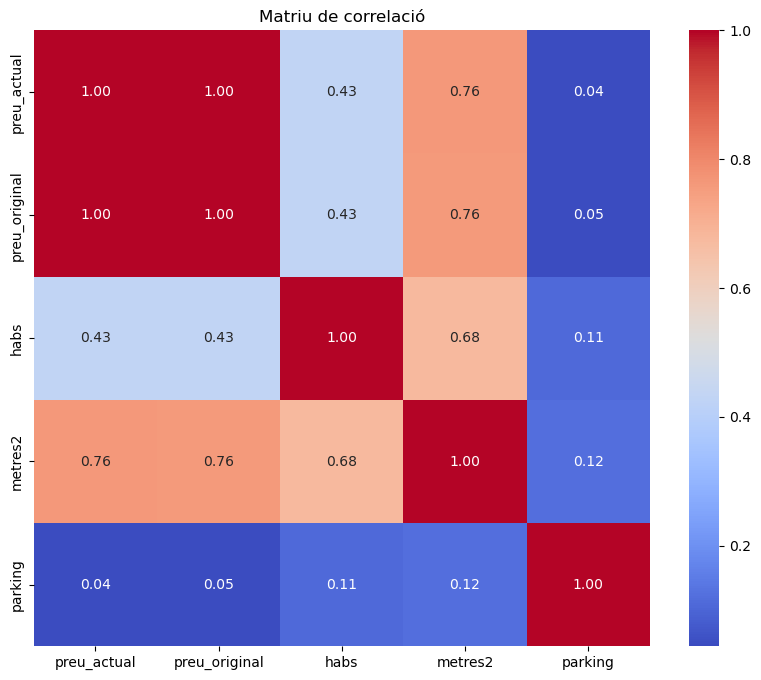

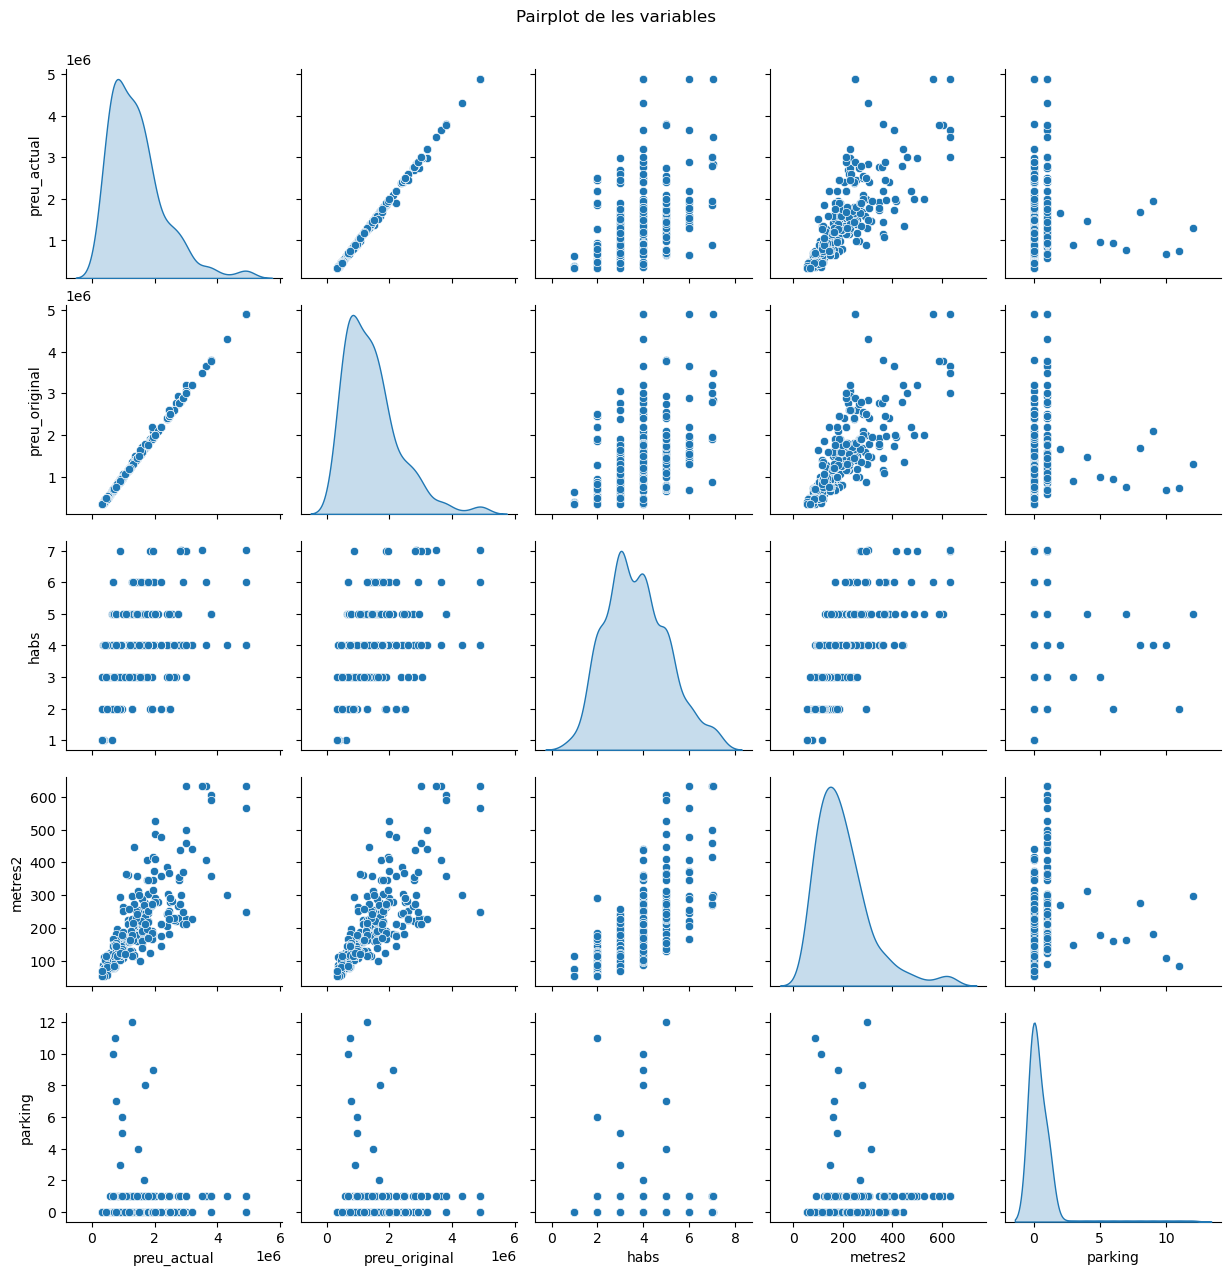

In [8]:
import seaborn as sns

data_encoded = data.copy()
data_encoded['parking'] = data_encoded['parking'].astype('category').cat.codes
correlation_matrix = data_encoded[['preu_actual', 'preu_original', 'habs', 'metres2', 'parking']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriu de correlació')
plt.show()

sns.pairplot(data_encoded[['preu_actual', 'preu_original', 'habs', 'metres2', 'parking']], diag_kind='kde')
plt.suptitle('Pairplot de les variables', y=1.02)
plt.show()

Pel que fa a la **matriu de correlació**, observem una correlació gairebé perfecta (1.00) entre el preu actual i el preu original, fet que indica que no hi ha hagut canvis significatius en els preus en el temps. La variable metres2 mostra una correlació forta (0.76) amb el preu actual i original, la qual cosa confirma que la mida de la propietat és un dels factors més determinants en el preu. També s'observa una correlació moderada entre el nombre d’habitacions (habs) i el preu (0.43), suggerint que el nombre d'habitacions influeix en el preu, tot i que no tant com la superfície. D’altra banda, la variable parking presenta una correlació molt baixa amb les altres variables, especialment amb el preu (0.04 per al preu actual), cosa que indica que la disponibilitat de places d’aparcament no és un factor clau en la determinació del preu de les propietats. Pel que fa als preus actual i original, es confirma una relació lineal gairebé perfecta, com ja s’observava a la matriu de correlació. Aquesta correlació és visible amb una línia pràcticament recta en el gràfic entre aquestes dues variables, fet que indica que qualsevol variació en el preu actual sol anar de la mà del preu original. La relació entre el preu i els metres quadrats (metres2) també mostra una forta correlació positiva, tal com es veu en la dispersió dels punts que segueixen una tendència ascendent clara: a més metres quadrats, el preu tendeix a ser més alt. Aquesta relació és menys marcada en comparació amb la correlació entre els preus, però segueix sent significativa. Per contra, el nombre d’habitacions (habs) no mostra una relació tan evident amb el preu, ja que els punts estan més dispersos. Malgrat això, es pot percebre una lleugera tendència a l’augment de preu a mesura que creix el nombre d’habitacions.

Quant als **pairplots**, veiem que la variable parking no té una correlació significativa amb cap de les altres variables, ja que els punts es distribueixen de manera bastant aleatòria en els gràfics corresponents. Això reforça la idea que la disponibilitat d’aparcament té un impacte mínim en el preu de les propietats en aquest conjunt de dades. Per altra banda, les distribucions diagonals mostren que els preus i els metres quadrats tenen distribucions assimètriques, amb una concentració més gran en valors més baixos i una cua que s’estén cap als valors més alts. 

## Anàlisi

In [9]:
# Eliminem preu actual i descripció
data[['descripcio', 'preu_actual']].isnull().sum()

descripcio     2
preu_actual    0
dtype: int64

### Supervisat

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convertim l'etiqueta "parking" de categòrica a numèrica
encoder = LabelEncoder()
data['parking'] = encoder.fit_transform(data['parking'])

# Pel model supervisat, separem la variable objectiu.
features = data[['habs', 'metres2', 'parking']]
target = data['preu_actual']

# Separem el conjunt en entrenament i testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Estandaritzem les característiques d'entrenament
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fem servir un model de regressió lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 438268.91749361734


R²: 0.6824747519908374
MAE: 337364.48878332163
Cross-validated RMSE: 592412.7074489562
Importància de les característiques:
  Característica    Importància
0           habs -149443.087099
1        metres2  778961.953270
2        parking  -24290.793468


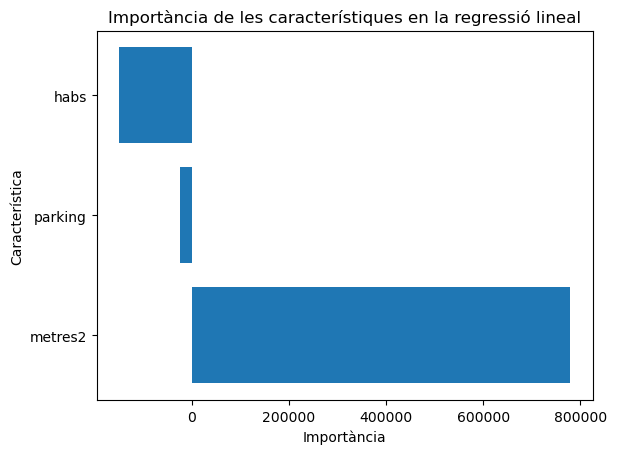

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Mètriques addicionals
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Validació creuada
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"Cross-validated RMSE: {cv_rmse}")

# Importància de les característiques
importance = lr_model.coef_
feature_importance = pd.DataFrame({'Característica': X_train.columns, 'Importància': importance})
print("Importància de les característiques:")
print(feature_importance)

# Visualització de la importància
import matplotlib.pyplot as plt
feature_importance.sort_values(by='Importància', ascending=False, inplace=True)
plt.barh(feature_importance['Característica'], feature_importance['Importància'])
plt.xlabel('Importància')
plt.ylabel('Característica')
plt.title('Importància de les característiques en la regressió lineal')
plt.show()

Pel que fa a les mètriques, el coeficient de determinació indica que el model explica un 68'2% de la variabilitat en els preus, un resultat acceptable tot i que hi ha marge de millora. L'error mitjà absolut suggereix que, de mitjana, el model s'equivoca en 337.364 euros, mentre que el RMSE més elevat (438.268) reflecteix que hi ha errors significatius en algunes prediccions. Analitzant la importància de les característiques, s'observa que els metres quadrats tenen el major impacte positiu en el preu, fet esperable ja que les propietats més grans solen tenir un valor més alt. D'altra banda, el nombre d'habitacions presenta un efecte sorprenentment negatiu, cosa que podria indicar la presència de correlacions no evidents al conjunt de dades, com ara la relació entre més habitacions i menys metres quadrats o ubicacions menys valorades. La variable pàrquing, tot i tenir una influència menor, també mostra un impacte negatiu, fet que podria significar que no és un factor determinant en el preu o que es correlaciona amb altres variables no considerades. 

### No supervisat

Ara farem la prova del colze per determinar el nombre òptim de clústers:

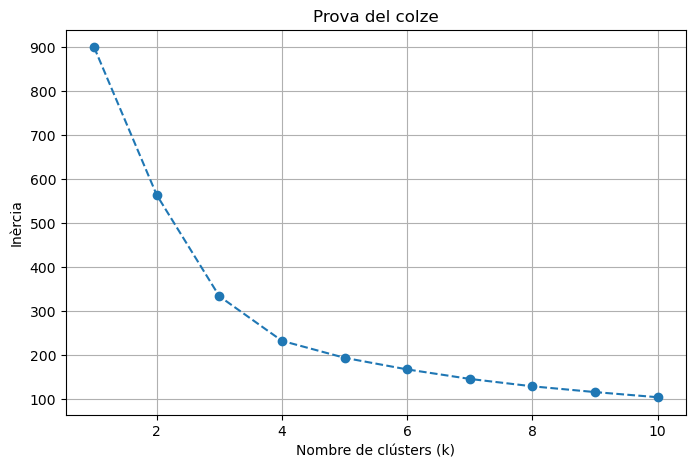

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalar les dades
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)  # 'features' és la teva matriu de característiques

# Prova del colze
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualització de la prova del colze
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Prova del colze')
plt.xlabel('Nombre de clústers (k)')
plt.ylabel('Inèrcia')
plt.grid(True)
plt.show()


Com es pot observar, la inèrcia disminueix de manera significativa a mesura que augmenta el nombre de clústers, però el decreixement es redueix notablement a partir de k=3 o k=4. Aquest punt d'inflexió o colze, suggereix que el nombre òptim de clústers pot estar al voltant de 3 o 4. Aquesta elecció ofereix un bon compromís entre la simplificació del model i la reducció de l'error intra-clúster, ja que una selecció de k més gran augmentaria la complexitat del model sense una millora significativa en la reducció de la inèrcia, mentre que una selecció més petita podria no capturar adequadament les estructures subjacents de les dades. Per confirmar aquesta interpretació, complementarem la prova del colze amb la silhouette score, per validar si k=3 o k=4 és realment el més adequat per a les dades.

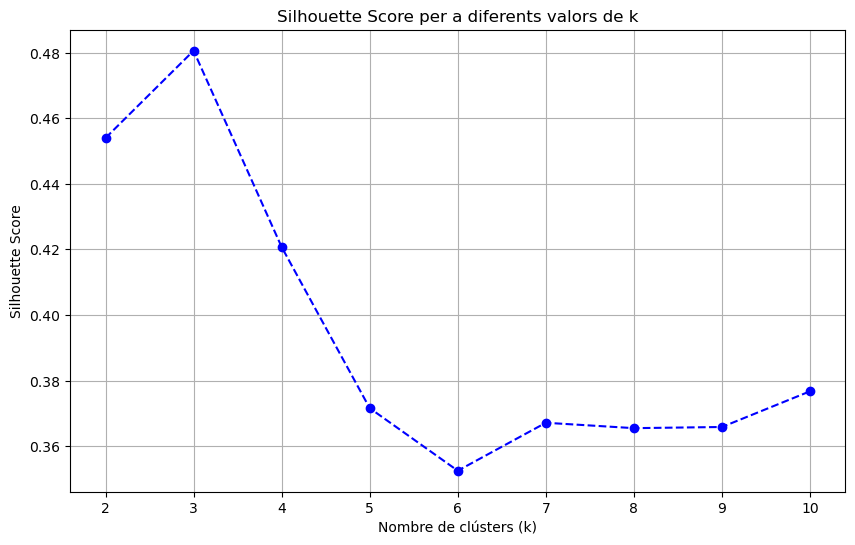

In [13]:
from sklearn.metrics import silhouette_score

# Calcular la Silhouette Score per diferents valors de k
silhouette_scores = []
range_n_clusters = range(2, 11)  # Es prova de k=2 fins a k=10

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Visualitzar els resultats
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score per a diferents valors de k')
plt.xlabel('Nombre de clústers (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()



A partir de la gràfica de la Silhouette Score per a diferents valors de k, podem observar que el valor més alt de la Silhouette Score es troba quan k=3, amb una puntuació de 0.48. Per tant, entre els valors analitzats, el nombre òptim de clústers és 3, ja que en aquest punt els clústers són més compactes i ben separats.

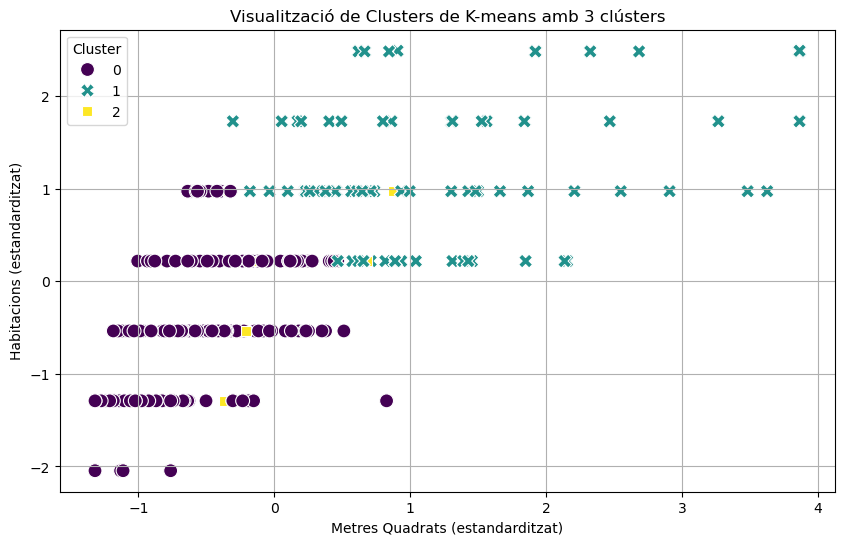

In [14]:
import os

# Limitem per evitar problemes de memòria
os.environ["OMP_NUM_THREADS"] = "2"

# K-means clustering amb 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

data['Cluster'] = clusters

plot_data = pd.DataFrame(data_scaled, columns=['habs', 'metres2', 'parking'])
plot_data['Cluster'] = data['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='metres2', y='habs', hue='Cluster', data=plot_data, palette='viridis', style='Cluster', s=100)
plt.title('Visualització de Clusters de K-means amb 3 clústers')
plt.xlabel('Metres Quadrats (estandarditzat)')
plt.ylabel('Habitacions (estandarditzat)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Com podem veure, el 3r clúster (representat per quadrats de color groc) no està agrupat, sinó que té els valors dispersos entre els altres 2 clústers. Fem ara una reducció de la dimensionalitat i provem amb diferents nombres de clústers.

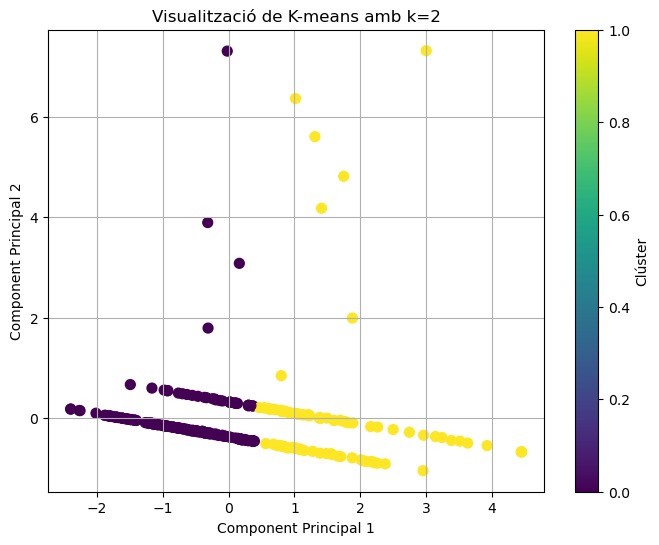

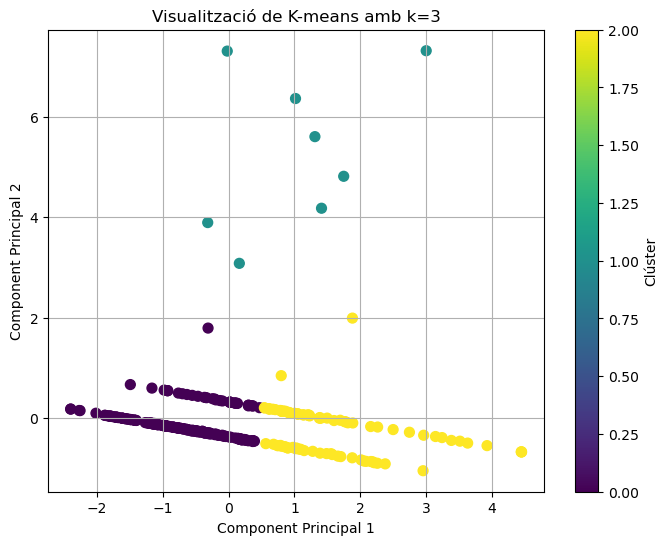

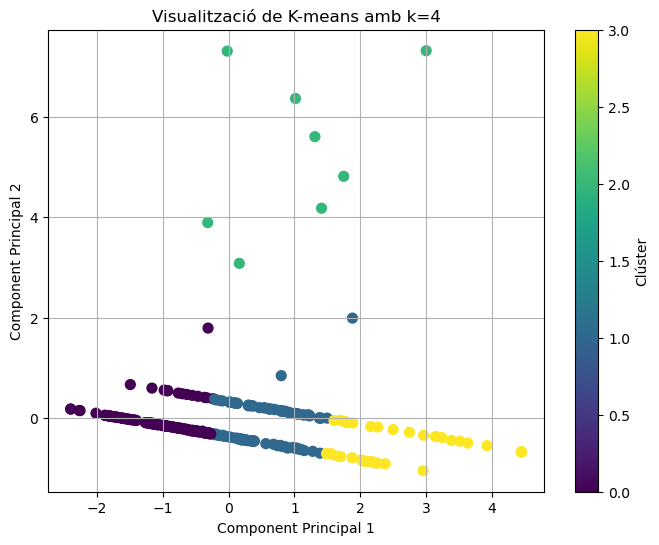

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reduir dimensionalitat amb PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualitzar K-means amb diferents nombres de clústers
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_pca)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f'Visualització de K-means amb k={k}')
    plt.xlabel('Component Principal 1')
    plt.ylabel('Component Principal 2')
    plt.grid(True)
    plt.colorbar(label='Clúster')
    plt.show()


Com pode veure als 3 gràfics, l'augment del nombre de clústers a 𝑘_3 i k=4 no ofereix una millora en la cohesió visual ni una separació clara entre els grups, ja que alguns clústers resultants es mostren dispersos i sense una agrupació significativa. Per aquest motiu, probarem l'algoritme DBSCAN, ja que aquest és més adequat per detectar estructures no lineals i pot identificar punts sorollosos o anomalies que K-means no gestiona correctament.

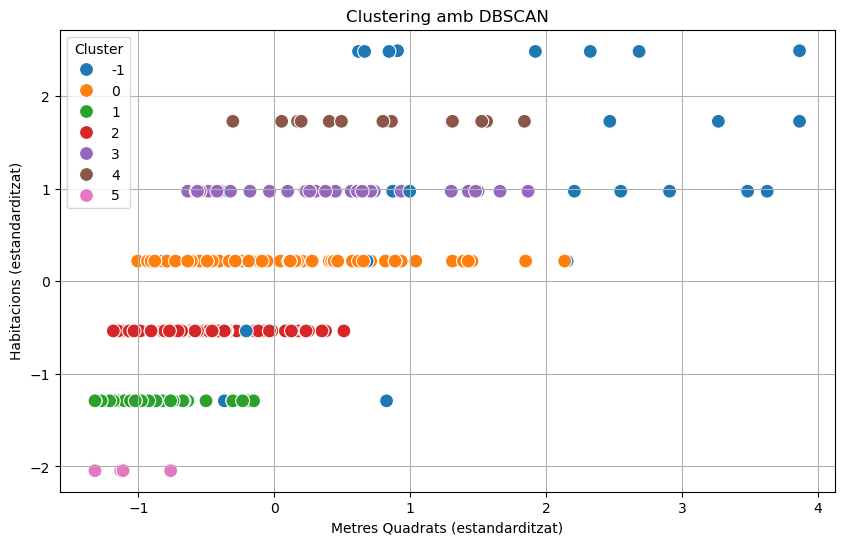

Nombre de punts per clúster:  2    86
 0    72
 1    47
 3    44
-1    31
 4    15
 5     5
dtype: int64
Punts classificats com a soroll (outliers): 31


In [16]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustem els paràmetres eps i min_samples 
# eps és el radi de la densitat i min_samples és el nombre mínim de punts necessaris per formar un clúster
dbscan = DBSCAN(eps=0.7, min_samples=5)

# Apliquem DBSCAN a les dades escalades
clusters = dbscan.fit_predict(data_scaled)

# Afegim els resultats al Dataframe original
data['Cluster'] = clusters

# Visualització dels clústers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='metres2', y='habs',
    hue='Cluster',
    data=pd.DataFrame(data_scaled, columns=['habs', 'metres2', 'parking']).assign(Cluster=clusters),
    palette='tab10',
    s=100
)
plt.title('Clustering amb DBSCAN')
plt.xlabel('Metres Quadrats (estandarditzat)')
plt.ylabel('Habitacions (estandarditzat)')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Comptem els punts classificats i els "outliers" (clúster -1)
print(f"Nombre de punts per clúster: {pd.Series(clusters).value_counts()}")
print(f"Punts classificats com a soroll (outliers): {(clusters == -1).sum()}")


L'aplicació de DBSCAN ha produït una distribució més natural dels clústers, amb cinc grups principals i un conjunt significatiu de punts classificats com a soroll (outliers). Els punts classificats com a soroll (40 en total) són aquells que no compleixen els criteris de densitat mínima especificats per eps=0.7 i min_samples=7. Per aconseguir aquesta configuració, hem provat diferents valors de eps i min_samples per trobar la combinació que produís la millor diferenciació dels grups. Aquesta classificació d'outliers pot ser útil per identificar propietats que no s'ajusten als patrons generals de la resta del conjunt de dades. Els resultats indiquen que DBSCAN ofereix una millor diferenciació dels grups en comparació amb K-means, sobretot per a dades que no són linealment separables o que contenen punts dispersos.

A partir d'aqui, podríem analitzar el resum estadístic de cada clúster i visualitzar-ne els patrons:

In [17]:
# Resum estadístic per clúster
cluster_summary = data.groupby('Cluster').agg({
    'habs': ['mean', 'std', 'min', 'max'],
    'metres2': ['mean', 'std', 'min', 'max'],
    'parking': ['mean', 'std', 'min', 'max'],
    'preu_actual': ['mean', 'std', 'min', 'max']
})
print(cluster_summary)


             habs                          metres2                      \
             mean       std  min   max        mean         std     min   
Cluster                                                                  
-1       5.097742  1.739963  2.0  7.01  376.698387  174.526912   86.00   
 0       4.000000  0.000000  4.0  4.00  215.652778   75.814481   89.00   
 1       2.000000  0.000000  2.0  2.00  111.212553   41.113051   53.99   
 2       3.000000  0.000000  3.0  3.00  149.162791   46.916161   69.00   
 3       5.000000  0.000000  5.0  5.00  237.522727   74.617938  130.00   
 4       6.000000  0.000000  6.0  6.00  280.533333   76.513180  167.00   
 5       1.000000  0.000000  1.0  1.00   75.196000   25.335983   53.99   

                  parking                     preu_actual                \
            max      mean       std min max          mean           std   
Cluster                                                                   
-1       631.55  2.838710  3.68869

L'anàlisi dels resultats mostra diferències significatives entre els clústers i els punts classificats com a soroll. Els outliers, agrupats sota el clúster -1, presenten una mitjana de metres quadrats elevada amb una gran dispersió, indicant propietats atípiques pel que fa a la mida. Aquestes propietats també tenen una mitjana d’habitacions superior als altres grups, suggerint que es tracta de cases grans o luxoses. El preu mitjà d'aquestes propietats és notablement superior, fet que reforça la hipòtesi que es tracta de casos excepcionals. Els altres clústers mostren patrons més coherents i uniformes. Per exemple, el clúster 0 representa propietats amb quatre habitacions, una mida mitjana de 215 metres quadrats i preus relativament alts, indicant un perfil d’habitatges més estandarditzat però amb cert valor al mercat. En canvi, el clúster 1 mostra propietats més petites, amb una mitjana de dues habitacions i una mida al voltant de 111 metres quadrats, amb preus notablement més baixos, reflectint possiblement habitatges més accessibles. El clúster 2 presenta una combinació de tres habitacions i una mida de 149 metres quadrats, amb preus intermedis, indicant un segment que podria representar propietats de mida mitjana. El clúster 4, tot i tenir una mida mitjana superior als altres, manté preus comparables als clústers 2 i 3, suggerint que altres factors més enllà de la mida poden influir en el valor. Finalment, el clúster 5 es caracteritza per propietats petites, amb una habitació i mides molt reduïdes, amb un preu que és el més baix de tots els grups, reflectint habitatges probablement destinats a públics amb menys capacitat adquisitiva. Aquestes diferències evidencien la diversitat dins del conjunt de dades i apunten cap a segments clarament definits en funció de les característiques físiques de les propietats i el seu preu al mercat.

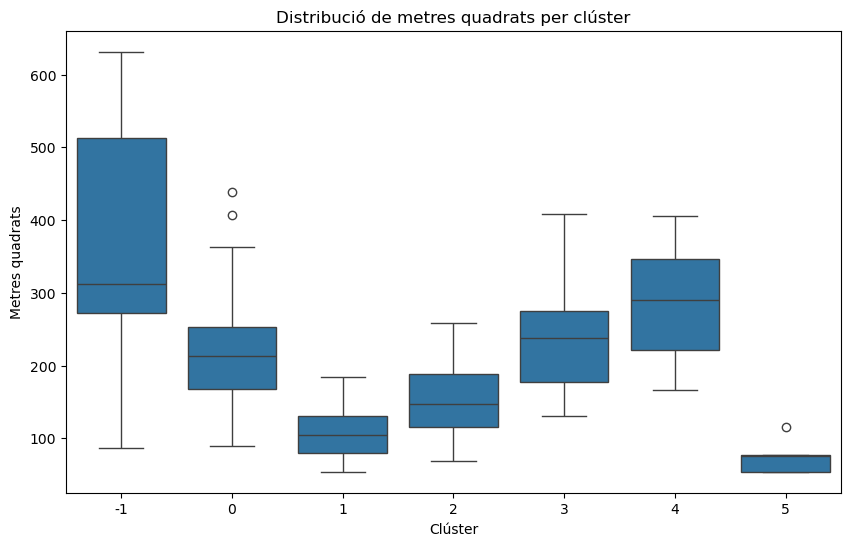

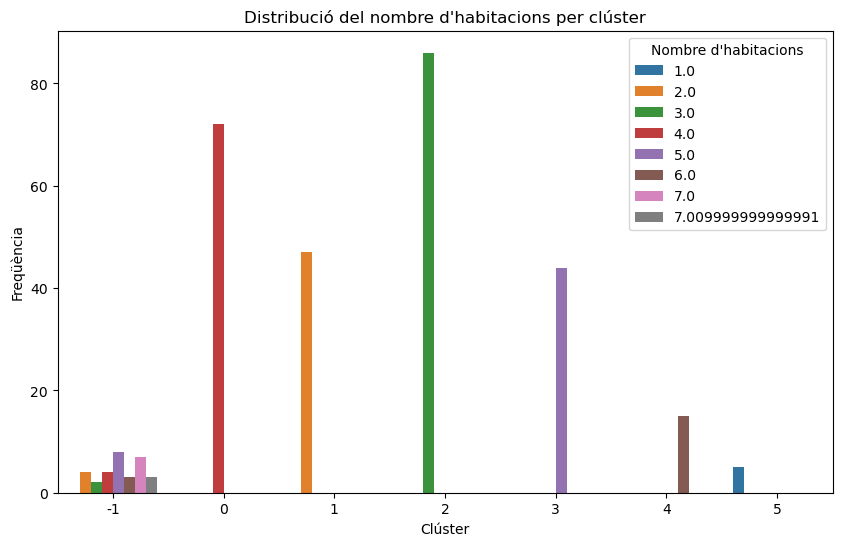

In [18]:
# Boxplot de metres quadrats per clúster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='metres2', data=data)
plt.title('Distribució de metres quadrats per clúster')
plt.xlabel('Clúster')
plt.ylabel('Metres quadrats')
plt.show()

# Histograma del nombre d'habitacions per clúster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='habs', data=data, palette='tab10')
plt.title('Distribució del nombre d\'habitacions per clúster')
plt.xlabel('Clúster')
plt.ylabel('Freqüència')
plt.legend(title='Nombre d\'habitacions')
plt.show()

Per una banda, el gràfic de distribució de metres quadrats per clúster ens mostra com els punts classificats com a soroll (clúster -1) presenten una gran variabilitat, amb valors significativament més elevats en comparació amb els altres grups, cosa que indica que aquestes propietats són substancialment més grans i no segueixen els patrons generals. El clúster 0 mostra una mida mitjana inferior als outliers però amb una distribució més controlada, reflectint habitatges més homogenis. El clúster 1 té la mida més reduïda, representant propietats petites, probablement apartaments o pisos econòmics. Els clústers 2, 3 i 4 presenten una progressió en la mida mitjana, indicant diferents segments de propietats amb característiques creixents en termes de metres quadrats. El clúster 5, per contra, conté propietats petites amb molt poca variabilitat, fet que podria reflectir un grup d’habitatges amb característiques molt similars.

El gràfic de freqüències de nombre d'habitacions per cluster reflecteix diferències significatives entre els grups. El clúster 0 està dominat per propietats amb 4 habitacions, indicant un perfil d'habitatge familiar. El clúster 1 està format principalment per propietats amb 2 habitacions, probablement apartaments més petits i enfocats a parelles o individus. El clúster 2 es caracteritza per habitatges amb 3 habitacions, que podrien representar una mida intermèdia entre els apartaments i les cases familiars. Al clúster 3, les propietats amb 5 habitacions són predominants, suggerint espais més grans, possiblement cases adossades o unifamiliars. El clúster 4 conté propietats amb 6 habitacions, reflectint habitatges molt amplis, i el clúster 5, tot i ser petit, està compost per habitatges amb només 1 habitació, indicant estudis o petits apartaments. Els punts classificats com a soroll (-1) mostren una distribució dispersa, amb una varietat d'habitacions que van des d'1 fins a 7, indicant que no segueixen un patró clar i podrien ser propietats atípiques o excepcionals. 

Farem també una comparativa amb els outliers:

In [19]:
outliers = data[data['Cluster'] == -1]

# Resum estadístic dels outliers
outliers_summary = outliers[['habs', 'metres2', 'parking', 'preu_actual']].describe()
print("Estadístiques dels outliers:")
print(outliers_summary)


Estadístiques dels outliers:
            habs     metres2    parking   preu_actual
count  31.000000   31.000000  31.000000  3.100000e+01
mean    5.097742  376.698387   2.838710  2.289661e+06
std     1.739963  174.526912   3.688692  1.194429e+06
min     2.000000   86.000000   0.000000  6.800000e+05
25%     4.000000  272.500000   0.500000  1.315000e+06
50%     5.000000  312.000000   1.000000  1.995000e+06
75%     7.000000  512.500000   4.500000  3.000000e+06
max     7.010000  631.550000  12.000000  4.900500e+06


L'anàlisi estadística dels punts classificats com a outliers revela característiques destacades en relació amb la resta del conjunt de dades. La mitjana del nombre d'habitacions en aquests outliers és de 5,09, amb un rang que oscil·la entre 2 i 7, cosa que suggereix que sovint són propietats de mida considerable. Pel que fa als metres quadrats, la mitjana és elevada, 376,69 m², amb un màxim de 631,55 m², indicant que aquests punts tendeixen a representar propietats molt espaioses. En termes de places d'aparcament, la mitjana és de 2,83, amb un màxim de 12, cosa que suggereix que moltes d'aquestes propietats tenen un alt nombre de places, fet poc habitual. Finalment, el preu actual mitjà d'aquestes propietats és de 2.289.661 €, amb un màxim que arriba als 4.900.500 €, demostrant que es tracta majoritàriament de propietats molt exclusives i amb un valor elevat. Aquestes característiques indiquen que els outliers solen ser propietats de luxe o amb característiques úniques que no encaixen en cap dels clústers principals definits pel model DBSCAN.

### Test d'hipòtesi

Contrast d'hipòtesi per veure si hi ha diferències estadísticament significatives en els preus entre els grups de propietats amb i sense parking.

1. Comprovar la normalitat de les distribucions dels preus.

In [20]:
from scipy.stats import shapiro

prices_with_parking = data[data['parking'] != 0]['preu_actual']
prices_without_parking = data[data['parking'] == 0]['preu_actual']

# Test Shapiro-Wilk
normality_test_with = shapiro(prices_with_parking)
normality_test_without = shapiro(prices_without_parking)

normality_test_with, normality_test_without

(ShapiroResult(statistic=0.8671867847442627, pvalue=9.804563205761951e-08),
 ShapiroResult(statistic=0.8700813055038452, pvalue=3.022572643562871e-12))

Els valors p són significativament menors que 0.05. Per tant,  rebutgem la hipòtesi nul·la que les dades provenen d'una distribució normal. Les distribucions dels preus tant per a propietats amb parking com sense no són normals.

Prova de Mann-Whitney

In [21]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(prices_with_parking, prices_without_parking, alternative='two-sided')

u_statistic, p_value

(13606.0, 3.121157841459005e-08)

El valor p és molt petit (significativament menor que 0.05). Per tant, hi ha diferències estadísticament significatives entre els preus de les propietats amb parking i aquelles sense parking.

### MLP

In [23]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_model.predict(X_test_scaled)

import numpy as np

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print("----- MLP Regressor -----")
print(f"MSE: {mse_mlp}")
print(f"RMSE: {rmse_mlp}")
print(f"R² : {r2_mlp}")
print(f"MAE: {mae_mlp}")

----- MLP Regressor -----
MSE: 2437648600171.1616
RMSE: 1561297.0890164247
R² : -3.029656448984312
MAE: 1362528.4474368247


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (64,32), (128,64)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [500, 1000]
}

mlp = MLPRegressor(random_state=42)

grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_mlp.fit(X_train_scaled, y_train)
print("Millors hiperparàmetres (MLP):", grid_search_mlp.best_params_)

best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test_scaled)

mse_best_mlp = mean_squared_error(y_test, y_pred_best_mlp)
rmse_best_mlp = np.sqrt(mse_best_mlp)

r2_best_mlp = r2_score(y_test, y_pred_best_mlp)
mae_best_mlp = mean_absolute_error(y_test, y_pred_best_mlp)

print("----- MLP Regressor (Millor model) -----")
print(f"MSE: {mse_best_mlp}")
print(f"RMSE: {rmse_best_mlp}")
print(f"R² : {r2_best_mlp}")
print(f"MAE: {mae_best_mlp}")

Millors hiperparàmetres (MLP): {'activation': 'tanh', 'hidden_layer_sizes': (64,), 'max_iter': 500, 'solver': 'lbfgs'}
----- MLP Regressor (Millor model) -----
MSE: 289860007740.9927
RMSE: 538386.4854739509
R² : 0.5208348531391608
MAE: 429958.3350933708


El primer model presenta un valor de R² negatiu i un RMSE elevat, després de la busca d'hiperparàmetres el R² ha canviat a 0.52 i el RMSE a 538386, reduint molt l'error. El model que ha donat millors resultats fa servir:
- capa d'activació tanh
- capa oculta de 64 neurones
- màxim de 500 iteracions
- optimitzador lbfgs

## Conclusions

El model de Perceptró Multicapa (MLP) amb hiperparàmetres optimitzats ha demostrat ser notablement superior als models inicials de regressió lineal, millorant el coeficient de R² a 0.52 i reduït l'error quadràtic mitjà, mostrant una millora significativa en la capacitat de predir el preu de les propietats.

L'anàlisi descriptiva de les dades ha revelat una variabilitat considerable en el preu de les propietats, amb una mitjana al voltant d’1,4 milions d'euros i una desviació estàndard alta. Això indica que, tot i una estabilitat aparent en els preus entre el valor original i l'actual, la presència de propietats de luxe amb preus molt elevats pot estar distorsionant aquesta percepció de estabilitat. A més, els metres quadrats han emergit com el factor més determinat del preu, mentre que el nombre d'habitacions i la disponibilitat de pàrquing semblen tenir un impacte menor.

L'aplicació de tècniques de clustering, particularment l'ús de l'algoritme DBSCAN, ha permès una millor diferenciació i identificació de propietats atípiques o outliers. Aquest enfocament ha resultat ser més adequat que el K-means per a aquestes dades, suggerint que algunes propietats no segueixen els patrons típics i poden necessitar una anàlisi més específica.

De cara al futur, seria recomanable explorar altres models, que podrien manejar millor la complexitat i la variabilitat dels dades. A més, una optimització més profunda i àmplia dels hiperparàmetres podria proporcionar millores addicionals en la precisió dels models. També, ampliar el volum de dades o aplicar tècniques d'augment de dades podria ajudar a millorar la generalització dels models i reduir el risc de sobreajustament. Finalment, seria útil realitzar una anàlisi més granular de l'impacte de les característiques menys influents, com el nombre d'habitacions o la disponibilitat de pàrquing, per entendre millor la seva relació amb el preu de les propietats dins diferents contextos o ubicacions. Aquestes accions no només podrien millorar la precisió dels models actuals, sinó també proporcionar una comprensió més profunda de la dinàmica del mercat immobiliari.